# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Income is the income earned by individuals, which comes from various activities such as business, work, investment, and others. Income grouping is a form of generalization of income that is grouped into certain numbers to group the income of each individual.This activity can be useful for companies to find out their type of consumption and can also be used to provide offers to consumers that are appropriate according to their income group.

# The Objective
In this project, I will create a model that can classify income based on consumers' personal data using a supervised learning model.

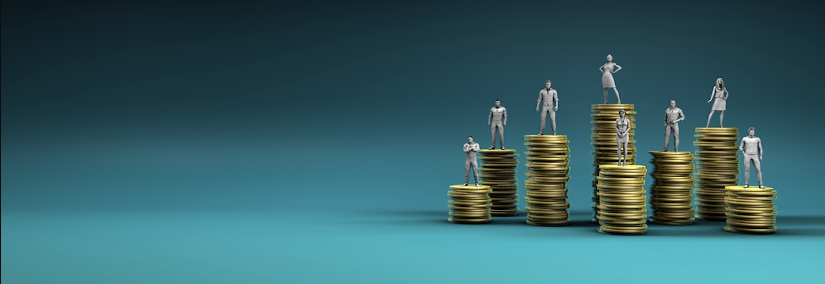

In [51]:
Image(filename='income bracket.png') 

# A. Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.svm import SVC

# B. Data Loading

In [3]:
df = pd.read_csv('Income_brackets_prediction.csv')

In [4]:
df.shape

(1995, 14)

In [5]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [6]:
df.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1990,34,Private,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1991,30,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1992,39,Private,11th,7,Married-civ-spouse,Other-service,Husband,Black,Male,2635,0,37,United-States,<=50K
1993,31,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1994,43,Private,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1995 non-null   int64 
 1   workclass       1995 non-null   object
 2   education       1995 non-null   object
 3   education_num   1995 non-null   int64 
 4   marital_status  1995 non-null   object
 5   occupation      1995 non-null   object
 6   relationship    1995 non-null   object
 7   race            1995 non-null   object
 8   sex             1995 non-null   object
 9   capital_gain    1995 non-null   int64 
 10  capital_loss    1995 non-null   int64 
 11  hours_per_week  1995 non-null   int64 
 12  native_country  1995 non-null   object
 13  income_bracket  1995 non-null   object
dtypes: int64(5), object(9)
memory usage: 218.3+ KB


In [8]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [9]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,41.497744,9.185965,1432.175940,101.097744,38.842607
std,11.947451,3.002173,8454.008852,429.724037,11.293179
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,32.000000,6.000000,0.000000,0.000000,36.000000
50%,40.000000,9.000000,0.000000,0.000000,40.000000
75%,50.000000,12.000000,0.000000,0.000000,40.000000
max,90.000000,16.000000,99999.000000,2415.000000,99.000000


### B. Data Cleaning

In [10]:
# checking duplicated data
df.duplicated().sum()

62

There are 62 duplicate data points; we will remove this row. 

In [11]:
# drop duplicate row
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# C. Exploratory Data Analysis

[Text(0, 0, '1182'), Text(0, 0, '751')]

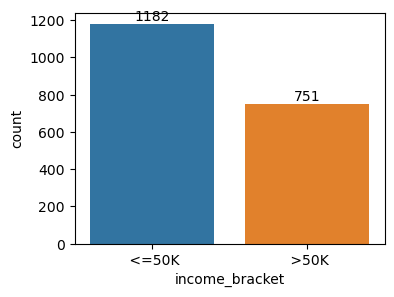

In [12]:
# Target
plt.figure(figsize=(4,3))
c = sns.countplot(data=df, x='income_bracket')
c.bar_label(c.containers[0], label_type='edge')

income_bracket <= 50 there are 1182 while income_bracket >50 there are 751.

interval columns not set, guessing: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


<AxesSubplot:>

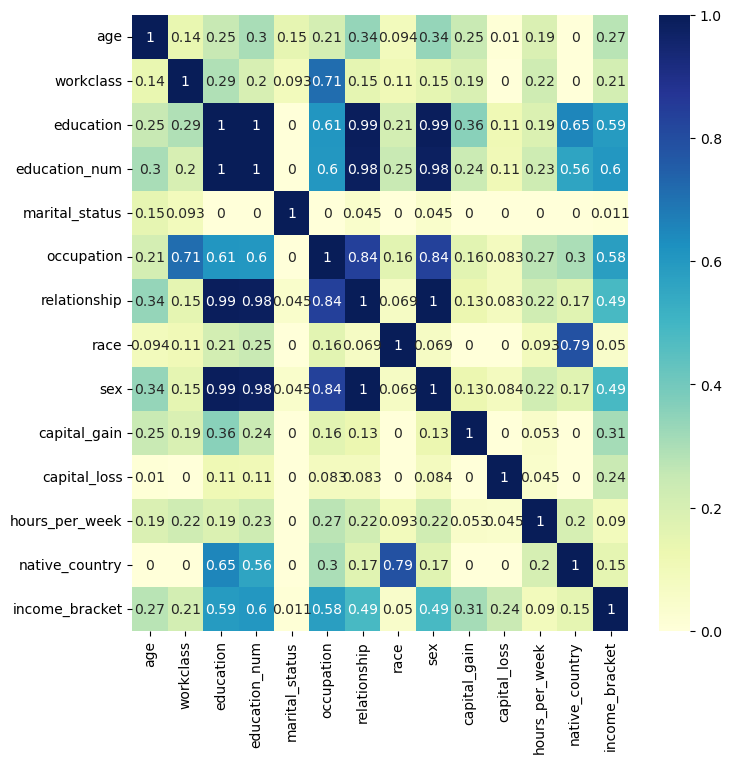

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

# D. Data Preprocessing

### D1. Feature Selection

In [14]:
data = df[['age', 'workclass', 'education', 'occupation', 'relationship', 'sex', 'capital_gain', 'capital_loss', 'income_bracket']]
data.head()

,age,workclass,education,occupation,relationship,sex,capital_gain,capital_loss,income_bracket
0,39,Private,9th,Other-service,Wife,Female,3411,0,<=50K
1,72,Private,9th,Exec-managerial,Wife,Female,0,0,>50K
2,45,Private,9th,Machine-op-inspct,Wife,Female,0,0,>50K
3,31,Private,9th,Exec-managerial,Wife,Female,0,0,<=50K
4,55,Private,9th,Tech-support,Wife,Female,0,0,<=50K


### D2. Data inference


In [15]:
# Inference data separation
df_inf = data.sample(5, random_state=41)

In [16]:
# Separating inference data from datasets
df_train_test = data.drop(df_inf.index)


In [17]:
# Reset Index for train-test data and inference data
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### D3. Train Data, Test Data

In [18]:
# separating train data from test
train, test = train_test_split(df_train_test, test_size=0.2, random_state=20)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (1542, 9)
Test size:  (386, 9)


### D4. Outlier

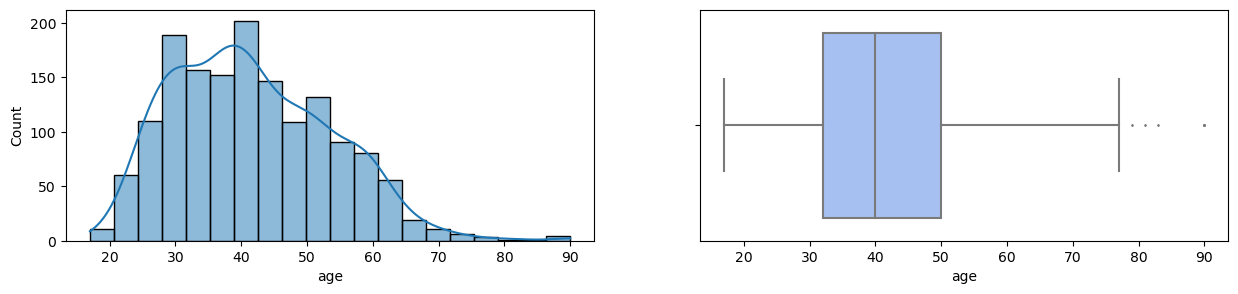

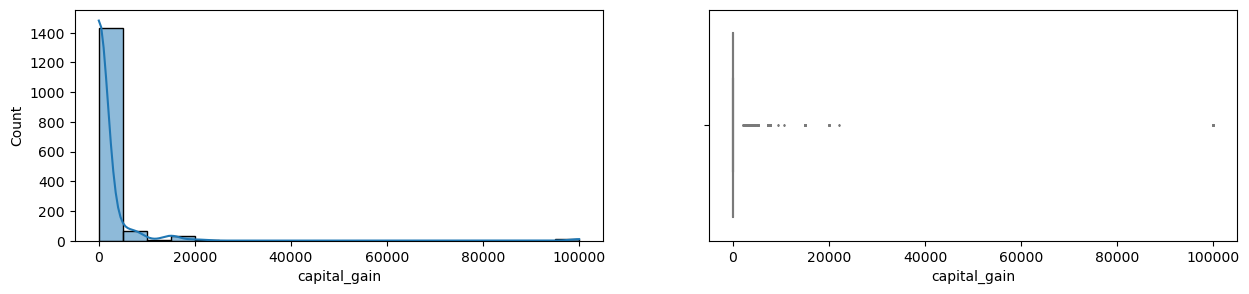

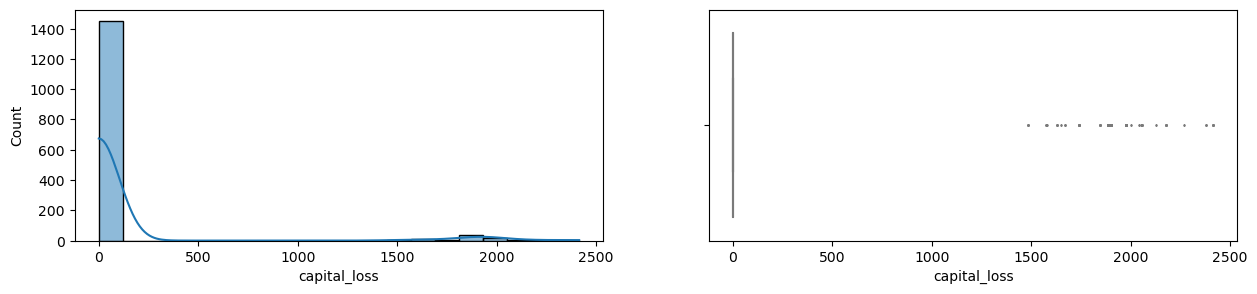

In [19]:
# Create functions to display the histogram and box plot.
num_col = ['age', 'capital_gain', 'capital_loss']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(train[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(train[i], ax = axs[1], color='#99befd', fliersize=1);

In [20]:
features_with_outliers = ['age']
for feature in features_with_outliers:
    q1 = train[feature].quantile(0.25)
    q3 = train[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    train.loc[train[feature]<lower_limit,feature] = lower_limit
    train.loc[train[feature]>upper_limit,feature] = upper_limit

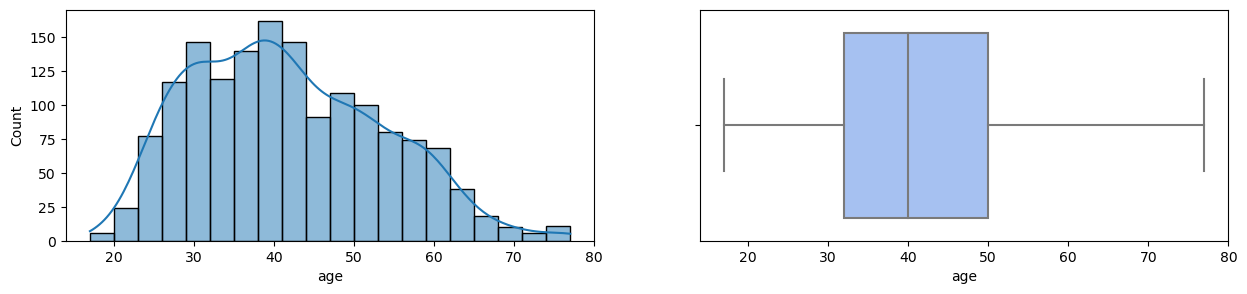

In [21]:
# Create functions to display the histogram and box plot.
num_col = ['age']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(train[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(train[i], ax = axs[1], color='#99befd', fliersize=1);

### D5. Split Feature dan Target

In [22]:
# Splitting feature data and target predict
X_train = train.drop(columns='income_bracket')
y_train = train['income_bracket']

X_test = test.drop(columns='income_bracket')
y_test = test['income_bracket']

### D6. Scaling and Encoding

In [23]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerical:', num_columns)
print('Kolom categorical:', cat_columns)

Kolom numerical: ['age', 'capital_gain', 'capital_loss']
Kolom categorical: ['workclass', 'education', 'occupation', 'relationship', 'sex']


In [24]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### Scaling

In [25]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 1.55630744, -0.17342611, -0.24606861],
       [ 1.13510797,  0.25517456, -0.24606861],
       [-1.05512924, -0.17342611, -0.24606861],
       ...,
       [ 1.89326701, -0.17342611, -0.24606861],
       [ 1.38782765, -0.17342611, -0.24606861],
       [-0.12849042, -0.17342611, -0.24606861]])

#### Encoding

In [26]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

#### Concate 

In [27]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

In [28]:
# dataframe
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.556307,-0.173426,-0.246069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.135108,0.255175,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.055129,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.212730,-0.173426,3.975308,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.465450,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-1.307849,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1538,-1.139369,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1539,1.893267,-0.173426,-0.246069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1540,1.387828,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# E. Model Training

### E1. Model Logistic Regression

In [29]:
logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=2, max_iter=200)

In [30]:
logreg.fit(X_train_final, y_train)

LogisticRegression(C=2, max_iter=200)

In [31]:
# predictions on train data and test data
y_pred_train = logreg.predict(X_train_final)
y_pred_test = logreg.predict(X_test_final)

### Logreg Evaluation

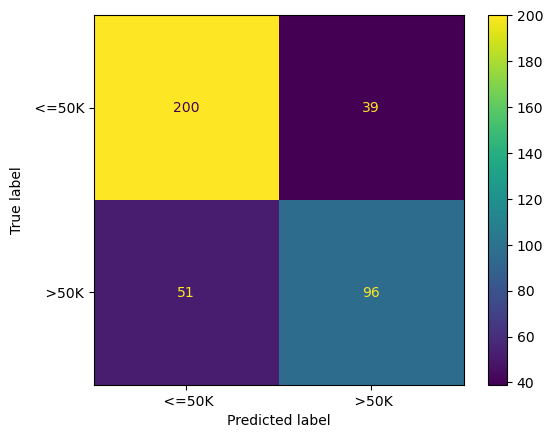

In [32]:
# confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logreg.classes_)

display.plot()
plt.show()

In [33]:
# Metric evaluation

y_prob_train = logreg.predict_proba(X_train_final)[:,1]
y_prob_test = logreg.predict_proba(X_test_final)[:,1]

print("="*22,"TRAINING","="*22)
print(classification_report(y_train, y_pred_train, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*24,"TEST","="*24)
print(classification_report(y_test, y_pred_test, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

====================== TRAINING ======================
              precision    recall  f1-score   support

       <=50K       0.78      0.85      0.81       941
        >50K       0.72      0.63      0.67       601

    accuracy                           0.76      1542
   macro avg       0.75      0.74      0.74      1542
weighted avg       0.76      0.76      0.76      1542

ROC-AUC Score Train: 0.8311952625892729


======================== TEST ========================
              precision    recall  f1-score   support

       <=50K       0.80      0.84      0.82       239
        >50K       0.71      0.65      0.68       147

    accuracy                           0.77       386
   macro avg       0.75      0.74      0.75       386
weighted avg       0.76      0.77      0.76       386

ROC-AUC Score Test: 0.8315259158056529


### Logreg Inference

In [34]:
df_inf

,age,workclass,education,occupation,relationship,sex,capital_gain,capital_loss,income_bracket
0,29,Self-emp-not-inc,10th,Craft-repair,Husband,Male,0,0,>50K
1,41,Private,Assoc-voc,Tech-support,Wife,Female,0,0,>50K
2,28,Private,9th,Sales,Husband,Male,4508,0,<=50K
3,42,Private,Some-college,Exec-managerial,Wife,Female,0,0,>50K
4,44,Private,Some-college,Adm-clerical,Wife,Female,0,0,<=50K


In [35]:
# separating numeric features from categorical features
data_inf_num = df_inf[num_columns]
data_inf_cat = df_inf[cat_columns]

In [36]:
# Scaling for numerical features
data_inf_num_scaled = scaler.transform(data_inf_num)

In [37]:
# encoding for categorical features
data_inf_cat_enc = encoder.transform(data_inf_cat).toarray()

In [38]:
# combines the scaled numeric feature and the encoded category feature.
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)

In [39]:
# Create a DataFrame for data_inf_final
data_inf_final_df = pd.DataFrame(data_inf_final)
data_inf_final_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.055129,-0.173426,-0.246069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.044251,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-1.139369,0.384349,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.039989,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.208469,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [40]:
# predict inf data
y_pred_inf = logreg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predict Income Bracket (LogReg)'])
y_pred_inf_df

,Predict Income Bracket (LogReg)
0,<=50K
1,>50K
2,<=50K
3,>50K
4,<=50K


In [41]:
# Result
pd.concat([df_inf, y_pred_inf_df], axis=1)

,age,workclass,education,occupation,relationship,sex,capital_gain,capital_loss,income_bracket,Predict Income Bracket (LogReg)
0,29,Self-emp-not-inc,10th,Craft-repair,Husband,Male,0,0,>50K,<=50K
1,41,Private,Assoc-voc,Tech-support,Wife,Female,0,0,>50K,>50K
2,28,Private,9th,Sales,Husband,Male,4508,0,<=50K,<=50K
3,42,Private,Some-college,Exec-managerial,Wife,Female,0,0,>50K,>50K
4,44,Private,Some-college,Adm-clerical,Wife,Female,0,0,<=50K,<=50K


## E2. Support Vector Machine (SVM)

In [42]:
svm = SVC( C=0.5, kernel='rbf', probability=True)

In [43]:
svm.fit(X_train_final, y_train)

SVC(C=0.5, probability=True)

In [44]:
# predictions on train data and test data
y_pred_train_svm = svm.predict(X_train_final)
y_pred_test_svm = svm.predict(X_test_final)

### SVM Evaluation

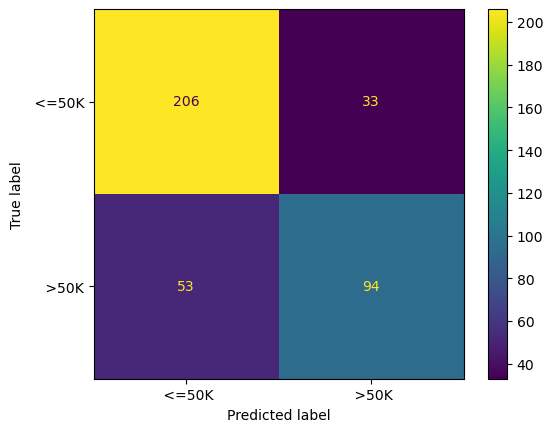

In [45]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test_svm, labels=svm.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=svm.classes_)

display.plot()
plt.show()

In [46]:
# Metric evaluation

y_prob_train_svm = svm.predict_proba(X_train_final)[:,1]
y_prob_test_svm = svm.predict_proba(X_test_final)[:,1]

print("="*22,"TRAINING","="*22)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_svm))
print("\n")
print("="*24,"TEST","="*24)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_svm))

====================== TRAINING ======================
              precision    recall  f1-score   support

       <=50K       0.80      0.88      0.84       941
        >50K       0.77      0.65      0.71       601

    accuracy                           0.79      1542
   macro avg       0.78      0.76      0.77      1542
weighted avg       0.79      0.79      0.78      1542

ROC-AUC Score Train: 0.8446407952739058


======================== TEST ========================
              precision    recall  f1-score   support

       <=50K       0.80      0.86      0.83       239
        >50K       0.74      0.64      0.69       147

    accuracy                           0.78       386
   macro avg       0.77      0.75      0.76       386
weighted avg       0.77      0.78      0.77       386

ROC-AUC Score Test: 0.8198132809609199


### SVM Inference

In [47]:
df_inf

,age,workclass,education,occupation,relationship,sex,capital_gain,capital_loss,income_bracket
0,29,Self-emp-not-inc,10th,Craft-repair,Husband,Male,0,0,>50K
1,41,Private,Assoc-voc,Tech-support,Wife,Female,0,0,>50K
2,28,Private,9th,Sales,Husband,Male,4508,0,<=50K
3,42,Private,Some-college,Exec-managerial,Wife,Female,0,0,>50K
4,44,Private,Some-college,Adm-clerical,Wife,Female,0,0,<=50K


In [48]:
# predict inf data
y_pred_inf_svm = svm.predict(data_inf_final)
y_pred_inf_svm_df = pd.DataFrame(y_pred_inf_svm, columns=['Predict Income Bracket (SVM)'])
y_pred_inf_svm_df

,Predict Income Bracket (SVM)
0,<=50K
1,>50K
2,<=50K
3,>50K
4,>50K


In [49]:
# Result
pd.concat([df_inf, y_pred_inf_svm_df], axis=1)

,age,workclass,education,occupation,relationship,sex,capital_gain,capital_loss,income_bracket,Predict Income Bracket (SVM)
0,29,Self-emp-not-inc,10th,Craft-repair,Husband,Male,0,0,>50K,<=50K
1,41,Private,Assoc-voc,Tech-support,Wife,Female,0,0,>50K,>50K
2,28,Private,9th,Sales,Husband,Male,4508,0,<=50K,<=50K
3,42,Private,Some-college,Exec-managerial,Wife,Female,0,0,>50K,>50K
4,44,Private,Some-college,Adm-clerical,Wife,Female,0,0,<=50K,>50K


# Summary Analysis

Data analysis lead the author to select the features 'age,' 'workclass,' 'education,' 'occupation,''relationship,''sex,' 'capital_gain,' and 'capital_loss'. Because in this column there is a correlation with the income bracket or income group.

After being analyzed and modeled, the author gets the results.The linear regression model has good accuracy results of 0.83% on training data and 0.83% on test data. Then in the matrix combination, we can see the prediction result of the remaining percentage error, which is 0.17%.- On the training data, the SVM model achieves a higher accuracy of 0.84%, but on the test data, the model slightly decreases its learning performance and achieves an accuracy of 0.81.Overall, the significance values are not much different, but the authors argue that the Logreg model can be used as the model chosen for the data development stage.Furthermore, hyperparameter tuning with GridSearchCV can be used to get better model performance.

#### Translate
Analysis data dan olahdata membuat penulis memilih feature 'age', 'workclass', 'education', 'occupation', 'relationship', 'sex', 'capital_gain', 'capital_loss'. karena pada kolom ini terdapat korelasi dengan income bracket atau golongan pendapatan.

setelah dianalisa dan dimodelkan penulis mendapatkan hasil
- model linear regression memiliki hasil akurasi yang baik yaitu 0.83% pada train data, dan 0.83% pada test data. kemudian pada counfusion matriknya nya kita dapat melihat hasil prediksi eror persentase yang tersisa yaitu 0.17%.
- pada model SVM, model mendapatkan akurasi yang lebih tinggi yaitu 0.84% pada train data, tetapi pada test data model sedikit mengalami penurunan performa belajarnya dan mendapatkan akurasi 0.81.
- secara keseluruhan nilai signifikansinya tidak jauh berbeda tetapi penulis berpendapat bahwa model logreg dapat dijadikan model yang dipilih untuk tahapan pengembangan data.
- Selanjutnya dapat digunakan Hyperparameter tunning dengan GridSearchCV untuk dapat mendapatkan performam model yang lebih baik.

# Conceptual Problems
- SVM menggunakan vektor sebagai penanda untuk membagi data ke dalam dua kelompok menggunakan 2 titik/vector jadi sesuai namanya SVM ini menggunakan vector, kemudian garis/sisi pembatas yang dibentuk dari dua buah vektor ini disebut dengan hyperplane.
- parameter kernal secara sederhana adalah metode yang dipakai untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik.